In [1]:
import pandas as pd
df = pd.read_excel(r'C:\Users\halit.erdogan\Downloads\itü-dataset_V3.xlsx', sheet_name='sipariş')

In [2]:
df.shape

(218633, 56)

In [3]:
df = df.loc[df['Ata_Statu']=='Sipariş Teslim Edildi']

In [4]:
df.shape

(209020, 56)

In [5]:
df = pd.concat(g for _, g in df.groupby("PackageId") if len(g) > 1)

In [6]:
SonTeslim_İlkTeslim = (df['Son_Siparis_Teslim_Zamani'] - df['ilk_Siparis_Teslim_Zamani']).astype('timedelta64[m]')
SonTeslim_SonYol = (df['Son_Siparis_Teslim_Zamani'] - df['Son_yola_cikma_Zamani']).astype('timedelta64[m]')
SonTeslim_İlkYol = (df['Son_Siparis_Teslim_Zamani'] - df['Yeni_ilk_yola_cikma_Zamani']).astype('timedelta64[m]')
İlkTeslim_İlkYol = (df['ilk_Siparis_Teslim_Zamani'] - df['Yeni_ilk_yola_cikma_Zamani']).astype('timedelta64[m]')
İlkTeslim_SonYol = (df['ilk_Siparis_Teslim_Zamani'] - df['Son_yola_cikma_Zamani']).astype('timedelta64[m]')
SonYol_İlkYol = (df['Son_yola_cikma_Zamani'] - df['Yeni_ilk_yola_cikma_Zamani']).astype('timedelta64[m]')

df['SonTeslim_İlkTeslim'] = SonTeslim_İlkTeslim
df['SonTeslim_SonYol'] = SonTeslim_SonYol
df['SonTeslim_İlkYol'] = SonTeslim_İlkYol
df['İlkTeslim_İlkYol'] = İlkTeslim_İlkYol
df['İlkTeslim_SonYol'] = İlkTeslim_SonYol
df['SonYol_İlkYol'] = SonYol_İlkYol

In [7]:
df_toBeRemoved = df[~df['İlkTeslim_İlkYol'].between(5,90)]

In [8]:
df_toBeRemoved = df_toBeRemoved[~df_toBeRemoved['SonTeslim_İlkYol'].between(5,90)]

In [9]:
df_toBeRemoved.shape

(6728, 62)

In [10]:
# Get all the Package IDs that will be dropped
packageID_toDrop = df_toBeRemoved['PackageId']

# Remove the duplicated Package IDs
packageIdDropList = []
for i in packageID_toDrop:
    if i not in packageIdDropList:
        packageIdDropList.append(i)

In [11]:
df = df[~df['PackageId'].isin(packageIdDropList)]
df

,ilk_Teslimat_Suresi,Son_Teslimat_Suresi,Adres_Dogrulama_Suresi,KT_Gelis_Suresi,Restaurant_Atama_Suresi,Restaurant_Kabul_Suresi,Restoran_Hazirlama_Suresi,Yola_Cikis_Suresi,Yolda_Gecen_Sure,Restaurant_Bekleme_Suresi,...,CustomerLat,CustomerLon,RestaurantLat,RestaurantLon,SonTeslim_İlkTeslim,SonTeslim_SonYol,SonTeslim_İlkYol,İlkTeslim_İlkYol,İlkTeslim_SonYol,SonYol_İlkYol
86202,21.400000,21.483333,NaN,0.083333,0.150000,0.250000,7.316666,0.733333,12.950000,0.733333,...,41.00201,29.19629,41.01450,29.18064,0.0,12.0,13.0,12.0,12.0,0.0
86322,32.900000,33.066666,NaN,0.033333,0.083333,0.350000,7.350000,0.083333,25.033333,0.083333,...,41.00443,29.19920,41.01450,29.18064,0.0,25.0,25.0,25.0,24.0,0.0
43007,45.400000,45.483333,NaN,0.283333,17.050000,3.350000,4.733333,5.783333,14.483333,5.783333,...,41.00179,29.19749,41.01450,29.18064,0.0,0.0,14.0,14.0,-1.0,14.0
43367,37.933333,37.983333,NaN,0.516666,14.783333,3.383333,9.783333,0.650000,9.333333,0.650000,...,41.00646,29.18848,41.01450,29.18064,0.0,-1.0,9.0,9.0,-1.0,9.0
128563,46.383333,46.533333,NaN,0.266666,20.150000,0.233333,16.250000,1.500000,8.250000,1.500000,...,41.01343,29.13329,41.01629,29.16255,0.0,8.0,8.0,8.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185189,25.366666,25.500000,NaN,0.350000,0.750000,1.033333,8.150000,3.766666,11.666666,3.766666,...,0.00000,0.00000,41.01546,29.17928,0.0,-1.0,11.0,11.0,-1.0,11.0
111318,15.000000,15.050000,NaN,0.533333,0.900000,0.816666,4.083333,0.033333,9.166666,0.033333,...,41.01570,29.17886,41.01546,29.17928,0.0,-1.0,9.0,9.0,-1.0,9.0
111978,24.650000,24.733333,NaN,0.300000,0.733333,1.300000,4.016666,0.066666,18.533333,0.066666,...,0.00000,0.00000,41.01546,29.17928,0.0,0.0,18.0,18.0,-1.0,18.0
173520,44.650000,44.666666,NaN,0.150000,13.400000,0.716666,14.116666,0.066666,16.350000,0.066666,...,0.00000,0.00000,41.01629,29.16255,0.0,16.0,16.0,16.0,16.0,0.0


In [12]:
def pickColumn(row):
    if 4<row['İlkTeslim_İlkYol']<91:
        return row['İlkTeslim_İlkYol']
    elif 4<row['SonTeslim_İlkYol']<91:
        return row['SonTeslim_İlkYol']
    else:
        return 'not valid'
    
df['Kurye Taşıma Süresi'] = df.apply (lambda row: pickColumn(row), axis=1)
df

,ilk_Teslimat_Suresi,Son_Teslimat_Suresi,Adres_Dogrulama_Suresi,KT_Gelis_Suresi,Restaurant_Atama_Suresi,Restaurant_Kabul_Suresi,Restoran_Hazirlama_Suresi,Yola_Cikis_Suresi,Yolda_Gecen_Sure,Restaurant_Bekleme_Suresi,...,CustomerLon,RestaurantLat,RestaurantLon,SonTeslim_İlkTeslim,SonTeslim_SonYol,SonTeslim_İlkYol,İlkTeslim_İlkYol,İlkTeslim_SonYol,SonYol_İlkYol,Kurye Taşıma Süresi
86202,21.400000,21.483333,NaN,0.083333,0.150000,0.250000,7.316666,0.733333,12.950000,0.733333,...,29.19629,41.01450,29.18064,0.0,12.0,13.0,12.0,12.0,0.0,12.0
86322,32.900000,33.066666,NaN,0.033333,0.083333,0.350000,7.350000,0.083333,25.033333,0.083333,...,29.19920,41.01450,29.18064,0.0,25.0,25.0,25.0,24.0,0.0,25.0
43007,45.400000,45.483333,NaN,0.283333,17.050000,3.350000,4.733333,5.783333,14.483333,5.783333,...,29.19749,41.01450,29.18064,0.0,0.0,14.0,14.0,-1.0,14.0,14.0
43367,37.933333,37.983333,NaN,0.516666,14.783333,3.383333,9.783333,0.650000,9.333333,0.650000,...,29.18848,41.01450,29.18064,0.0,-1.0,9.0,9.0,-1.0,9.0,9.0
128563,46.383333,46.533333,NaN,0.266666,20.150000,0.233333,16.250000,1.500000,8.250000,1.500000,...,29.13329,41.01629,29.16255,0.0,8.0,8.0,8.0,8.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185189,25.366666,25.500000,NaN,0.350000,0.750000,1.033333,8.150000,3.766666,11.666666,3.766666,...,0.00000,41.01546,29.17928,0.0,-1.0,11.0,11.0,-1.0,11.0,11.0
111318,15.000000,15.050000,NaN,0.533333,0.900000,0.816666,4.083333,0.033333,9.166666,0.033333,...,29.17886,41.01546,29.17928,0.0,-1.0,9.0,9.0,-1.0,9.0,9.0
111978,24.650000,24.733333,NaN,0.300000,0.733333,1.300000,4.016666,0.066666,18.533333,0.066666,...,0.00000,41.01546,29.17928,0.0,0.0,18.0,18.0,-1.0,18.0,18.0
173520,44.650000,44.666666,NaN,0.150000,13.400000,0.716666,14.116666,0.066666,16.350000,0.066666,...,0.00000,41.01629,29.16255,0.0,16.0,16.0,16.0,16.0,0.0,16.0


In [13]:
# Validating that "Kurye Taşıma Süresi" is not "not valid" in any row
len(df[df['Kurye Taşıma Süresi'] == 'not valid'])

0

In [14]:
df.dropna(subset = ["CustomerLat"], inplace=True)

In [15]:
df

,ilk_Teslimat_Suresi,Son_Teslimat_Suresi,Adres_Dogrulama_Suresi,KT_Gelis_Suresi,Restaurant_Atama_Suresi,Restaurant_Kabul_Suresi,Restoran_Hazirlama_Suresi,Yola_Cikis_Suresi,Yolda_Gecen_Sure,Restaurant_Bekleme_Suresi,...,CustomerLon,RestaurantLat,RestaurantLon,SonTeslim_İlkTeslim,SonTeslim_SonYol,SonTeslim_İlkYol,İlkTeslim_İlkYol,İlkTeslim_SonYol,SonYol_İlkYol,Kurye Taşıma Süresi
86202,21.400000,21.483333,NaN,0.083333,0.150000,0.250000,7.316666,0.733333,12.950000,0.733333,...,29.19629,41.01450,29.18064,0.0,12.0,13.0,12.0,12.0,0.0,12.0
86322,32.900000,33.066666,NaN,0.033333,0.083333,0.350000,7.350000,0.083333,25.033333,0.083333,...,29.19920,41.01450,29.18064,0.0,25.0,25.0,25.0,24.0,0.0,25.0
43007,45.400000,45.483333,NaN,0.283333,17.050000,3.350000,4.733333,5.783333,14.483333,5.783333,...,29.19749,41.01450,29.18064,0.0,0.0,14.0,14.0,-1.0,14.0,14.0
43367,37.933333,37.983333,NaN,0.516666,14.783333,3.383333,9.783333,0.650000,9.333333,0.650000,...,29.18848,41.01450,29.18064,0.0,-1.0,9.0,9.0,-1.0,9.0,9.0
128563,46.383333,46.533333,NaN,0.266666,20.150000,0.233333,16.250000,1.500000,8.250000,1.500000,...,29.13329,41.01629,29.16255,0.0,8.0,8.0,8.0,8.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185189,25.366666,25.500000,NaN,0.350000,0.750000,1.033333,8.150000,3.766666,11.666666,3.766666,...,0.00000,41.01546,29.17928,0.0,-1.0,11.0,11.0,-1.0,11.0,11.0
111318,15.000000,15.050000,NaN,0.533333,0.900000,0.816666,4.083333,0.033333,9.166666,0.033333,...,29.17886,41.01546,29.17928,0.0,-1.0,9.0,9.0,-1.0,9.0,9.0
111978,24.650000,24.733333,NaN,0.300000,0.733333,1.300000,4.016666,0.066666,18.533333,0.066666,...,0.00000,41.01546,29.17928,0.0,0.0,18.0,18.0,-1.0,18.0,18.0
173520,44.650000,44.666666,NaN,0.150000,13.400000,0.716666,14.116666,0.066666,16.350000,0.066666,...,0.00000,41.01629,29.16255,0.0,16.0,16.0,16.0,16.0,0.0,16.0


In [16]:
indexList_NoCoords = []
PackageList_NoCoords = []
for index, row in df.iterrows():
    if row['CustomerLat'] <= 0:
        PackageList_NoCoords.append(row['PackageId'])
        indexList_NoCoords.append(index)

In [17]:
import numpy as np
def unique(list1):
    x = np.array(list1)
    return np.unique(x)
    
PackageList_NoCoords_unique = unique(PackageList_NoCoords)
PackageList_NoCoords_unique = PackageList_NoCoords_unique.tolist()


In [18]:
# Removing the packages where at least one customer's coordinates are unknown
df = df.loc[~df['PackageId'].isin(PackageList_NoCoords_unique)]

In [19]:
df['PackageId'].value_counts()

671F1423-94E9-401D-87A3-3DCB48F39450    7
7DEC7829-CCBA-4597-B3FE-A5EAA026D925    7
987363CE-40E9-478C-B3F6-C618F79CB1B9    6
75377B3C-F0F6-40F7-B111-2820D4AF6E2D    6
78E56C48-53DF-49BA-885D-504742EC5962    6
                                       ..
39DBD21A-F61E-4CD3-A446-D041382953ED    1
B6125519-E5CD-4F20-A167-58F6F36D314C    1
628C4522-0708-4448-ADF3-0E2AE3763B52    1
1EB97C26-0358-4109-BF90-B1A849E9BC96    1
074A5943-34D5-4D3B-AEF8-297E4831A527    1
Name: PackageId, Length: 34747, dtype: int64

In [20]:
df = df.reset_index()

In [21]:
df_PackageGrouped = df.groupby('PackageId')
PackageIDlist = df['PackageId'].unique()

In [22]:
coordsList = []
for item in PackageIDlist:
    df_PackageTemp = df_PackageGrouped.get_group(item)
    df_PackageTemp = df_PackageTemp.sort_values(by='Kurye Taşıma Süresi')
    df_PackageTemp = df_PackageTemp.reset_index()
    
    for index, row in df_PackageTemp.iterrows():
        if index == 0:
            coordsTemp = {"packageId" : row["PackageId"],
                          "firstLoc": [row["RestaurantLat"], row["RestaurantLon"] ] ,
                          "destLoc": [row["CustomerLat"], row["CustomerLon"] ]}
        else:
            prevRow = df_PackageTemp.iloc[index-1]
            coordsTemp = {"packageId" : row["PackageId"],
                          "firstLoc": [ prevRow["CustomerLat"], prevRow["CustomerLon"] ] ,
                          "destLoc": [row["CustomerLat"], row["CustomerLon"] ]}
        coordsList.append(coordsTemp)

In [23]:
len(coordsList)

82028

In [24]:
df.shape

(82028, 64)

In [26]:
import json

final = json.dumps(coordsList, indent=4)
# convert into json
# file name is mydata
# from google.colab import files
with open("coordinates.json", "w") as final:
    json.dump(coordsList, final)
    
# download the json file
# files.download('coordinates.json')

In [26]:
import json
f = open(r'C:\Users\halit.erdogan\PycharmProjects\pythonProject\coordinate_distance.json')
# returns JSON object as a dictionary
data = json.load(f)

In [28]:
df_distances = pd.DataFrame(data)
df_distances = df_distances[['packageId','distance']]
df_distances

,packageId,distance
0,000039F9-1E01-44DE-94E7-29D8D65661EF,2974
1,000039F9-1E01-44DE-94E7-29D8D65661EF,520
2,0000617F-0241-4EAA-B012-79B52FB904E5,2129
3,0000617F-0241-4EAA-B012-79B52FB904E5,1107
4,0000DD30-7B3D-4998-A098-FEF2E6B6BFE3,3190
...,...,...
82023,FFEE1187-CD51-48ED-A1AB-F9597F39D26D,560
82024,FFF0E23C-7D2C-4F48-B14E-06782BFAFCA1,854
82025,FFF0E23C-7D2C-4F48-B14E-06782BFAFCA1,829
82026,FFF4F3B1-1A96-454C-9A18-680E9B185A23,1670


In [30]:
df_distances = df_distances.groupby(by=['packageId']).sum()
df_distances

,distance
packageId,
000039F9-1E01-44DE-94E7-29D8D65661EF,3494
0000617F-0241-4EAA-B012-79B52FB904E5,3236
0000DD30-7B3D-4998-A098-FEF2E6B6BFE3,4509
0000F900-B4BA-49A9-B241-9C24AC60268C,2440
00010DCC-812E-4D1E-BB36-25E2F35D9E2B,4694
...,...
FFED2B86-960D-4A04-8A32-ABB9B9BEADC3,4398
FFED9DE8-CB6A-4870-9BE9-EAABD56FFE31,2192
FFEE1187-CD51-48ED-A1AB-F9597F39D26D,1220


In [44]:
rows = []
for item in PackageIDlist:
    df_PackageTemp = df_PackageGrouped.get_group(item)
    df_PackageTemp = df_PackageTemp.sort_values(by='Kurye Taşıma Süresi')
    df_PackageTemp = df_PackageTemp.reset_index()
    df_PackageTemp = df_PackageTemp[['PackageId', 'RestaurantId', 'Kuryeid', 'Siparis_Saati', 'WorkDate', 'Kurye Taşıma Süresi']]
    stops = df_PackageTemp.shape[0]
    df_PackageTemp = df_PackageTemp.iloc[-1:]
    df_PackageTemp['Stops'] = stops
    df_PackageTemp['TotalDistance'] = df_distances.loc[item].iloc[0]

    rows.append(df_PackageTemp)
result = pd.concat(rows)

In [46]:
df_final = result.reset_index()
df_final

,index,PackageId,RestaurantId,Kuryeid,Siparis_Saati,WorkDate,Kurye Taşıma Süresi,Stops,TotalDistance
0,1,000039F9-1E01-44DE-94E7-29D8D65661EF,7FED6034-9C99-E511-9413-005056800F4E,F9C66207-5EFA-E911-9420-005056800F4E,20,20201026,25.0,2,3494
1,1,0000617F-0241-4EAA-B012-79B52FB904E5,7FED6034-9C99-E511-9413-005056800F4E,CEC27033-864A-441C-9F29-330B584715C1,16,20210926,14.0,2,3236
2,1,0000DD30-7B3D-4998-A098-FEF2E6B6BFE3,8C258EF2-DA4D-E811-941D-005056800F4E,E2060C54-5F99-4F20-B37C-5BE58D4A8164,20,20210107,21.0,2,4509
3,1,0000F900-B4BA-49A9-B241-9C24AC60268C,7FED6034-9C99-E511-9413-005056800F4E,1EF7DAF7-9998-E711-9420-005056800C1E,15,20210109,16.0,2,2440
4,2,00010DCC-812E-4D1E-BB36-25E2F35D9E2B,2F6ED9C0-FB34-E511-9415-005056801A6F,1EF7DAF7-9998-E711-9420-005056800C1E,14,20210705,31.0,3,4694
...,...,...,...,...,...,...,...,...,...
34742,1,FFED2B86-960D-4A04-8A32-ABB9B9BEADC3,7FED6034-9C99-E511-9413-005056800F4E,5655C632-296B-4644-A79A-1ECD8E5607A8,13,20210301,17.0,2,4398
34743,1,FFED9DE8-CB6A-4870-9BE9-EAABD56FFE31,7FED6034-9C99-E511-9413-005056800F4E,1EF7DAF7-9998-E711-9420-005056800C1E,16,20201111,12.0,2,2192
34744,1,FFEE1187-CD51-48ED-A1AB-F9597F39D26D,8C258EF2-DA4D-E811-941D-005056800F4E,D037A34D-1D5D-E911-941A-0050568045BB,18,20210603,10.0,2,1220
34745,1,FFF0E23C-7D2C-4F48-B14E-06782BFAFCA1,7FED6034-9C99-E511-9413-005056800F4E,FDE3058C-FE4B-44E7-8912-3E265839C530,12,20210623,19.0,2,1683


In [48]:
import datetime
def ConvertWeekday(rawNumbers):
    year = int(rawNumbers[0:4])
    #print("year: " + str(year))
    month = int(rawNumbers[4:6])
    #print("month: " + str(month))
    day = int(rawNumbers[6:8])
    #print("day: " + str(day))
    date = datetime.datetime(year,month,day)
    weekday = date.weekday()
    return(weekday)
    

Weekdays=[]
for cell in df_final['WorkDate']:
    cell = int(cell)
    cell = str(cell)
    weekDayTemp = ConvertWeekday(cell)
    Weekdays.append(weekDayTemp)

df_final['Week Day'] = Weekdays

In [51]:
df_final = df_final.drop(columns=['index'])
df_final

,PackageId,RestaurantId,Kuryeid,Siparis_Saati,WorkDate,Kurye Taşıma Süresi,Stops,TotalDistance,Week Day
0,000039F9-1E01-44DE-94E7-29D8D65661EF,7FED6034-9C99-E511-9413-005056800F4E,F9C66207-5EFA-E911-9420-005056800F4E,20,20201026,25.0,2,3494,0
1,0000617F-0241-4EAA-B012-79B52FB904E5,7FED6034-9C99-E511-9413-005056800F4E,CEC27033-864A-441C-9F29-330B584715C1,16,20210926,14.0,2,3236,6
2,0000DD30-7B3D-4998-A098-FEF2E6B6BFE3,8C258EF2-DA4D-E811-941D-005056800F4E,E2060C54-5F99-4F20-B37C-5BE58D4A8164,20,20210107,21.0,2,4509,3
3,0000F900-B4BA-49A9-B241-9C24AC60268C,7FED6034-9C99-E511-9413-005056800F4E,1EF7DAF7-9998-E711-9420-005056800C1E,15,20210109,16.0,2,2440,5
4,00010DCC-812E-4D1E-BB36-25E2F35D9E2B,2F6ED9C0-FB34-E511-9415-005056801A6F,1EF7DAF7-9998-E711-9420-005056800C1E,14,20210705,31.0,3,4694,0
...,...,...,...,...,...,...,...,...,...
34742,FFED2B86-960D-4A04-8A32-ABB9B9BEADC3,7FED6034-9C99-E511-9413-005056800F4E,5655C632-296B-4644-A79A-1ECD8E5607A8,13,20210301,17.0,2,4398,0
34743,FFED9DE8-CB6A-4870-9BE9-EAABD56FFE31,7FED6034-9C99-E511-9413-005056800F4E,1EF7DAF7-9998-E711-9420-005056800C1E,16,20201111,12.0,2,2192,2
34744,FFEE1187-CD51-48ED-A1AB-F9597F39D26D,8C258EF2-DA4D-E811-941D-005056800F4E,D037A34D-1D5D-E911-941A-0050568045BB,18,20210603,10.0,2,1220,3
34745,FFF0E23C-7D2C-4F48-B14E-06782BFAFCA1,7FED6034-9C99-E511-9413-005056800F4E,FDE3058C-FE4B-44E7-8912-3E265839C530,12,20210623,19.0,2,1683,2


In [62]:
def ExtractMonth(rawNumbers):
    rawNumbers = str(rawNumbers)
    month = int(rawNumbers[4:6])
    return(month)

months=[]
for cell in df_final['WorkDate']:
    cell = int(cell)
    cell = str(cell)
    monthTemp = ExtractMonth(cell)
    months.append(monthTemp)

df_final['Month'] = months
df_final

,PackageId,RestaurantId,Kuryeid,Siparis_Saati,WorkDate,Kurye Taşıma Süresi,Stops,TotalDistance,Week Day,Month
0,000039F9-1E01-44DE-94E7-29D8D65661EF,7FED6034-9C99-E511-9413-005056800F4E,F9C66207-5EFA-E911-9420-005056800F4E,20,20201026,25.0,2,3494,0,10
1,0000617F-0241-4EAA-B012-79B52FB904E5,7FED6034-9C99-E511-9413-005056800F4E,CEC27033-864A-441C-9F29-330B584715C1,16,20210926,14.0,2,3236,6,9
2,0000DD30-7B3D-4998-A098-FEF2E6B6BFE3,8C258EF2-DA4D-E811-941D-005056800F4E,E2060C54-5F99-4F20-B37C-5BE58D4A8164,20,20210107,21.0,2,4509,3,1
3,0000F900-B4BA-49A9-B241-9C24AC60268C,7FED6034-9C99-E511-9413-005056800F4E,1EF7DAF7-9998-E711-9420-005056800C1E,15,20210109,16.0,2,2440,5,1
4,00010DCC-812E-4D1E-BB36-25E2F35D9E2B,2F6ED9C0-FB34-E511-9415-005056801A6F,1EF7DAF7-9998-E711-9420-005056800C1E,14,20210705,31.0,3,4694,0,7
...,...,...,...,...,...,...,...,...,...,...
34742,FFED2B86-960D-4A04-8A32-ABB9B9BEADC3,7FED6034-9C99-E511-9413-005056800F4E,5655C632-296B-4644-A79A-1ECD8E5607A8,13,20210301,17.0,2,4398,0,3
34743,FFED9DE8-CB6A-4870-9BE9-EAABD56FFE31,7FED6034-9C99-E511-9413-005056800F4E,1EF7DAF7-9998-E711-9420-005056800C1E,16,20201111,12.0,2,2192,2,11
34744,FFEE1187-CD51-48ED-A1AB-F9597F39D26D,8C258EF2-DA4D-E811-941D-005056800F4E,D037A34D-1D5D-E911-941A-0050568045BB,18,20210603,10.0,2,1220,3,6
34745,FFF0E23C-7D2C-4F48-B14E-06782BFAFCA1,7FED6034-9C99-E511-9413-005056800F4E,FDE3058C-FE4B-44E7-8912-3E265839C530,12,20210623,19.0,2,1683,2,6


In [63]:
def ExtractMonth(rawNumbers):
    rawNumbers = str(rawNumbers)
    month = int(rawNumbers[4:6])
    return(month)

In [64]:
writer = pd.ExcelWriter('final.xlsx')
# write dataframe to excel
df_final.to_excel(writer)
# save the excel
writer.save()

SyntaxError: cannot assign to operator (Temp/ipykernel_12692/675917529.py, line 1)

In [66]:
df_final

,PackageId,RestaurantId,Kuryeid,Siparis_Saati,WorkDate,Kurye Taşıma Süresi,Stops,TotalDistance,Week Day,Month
0,000039F9-1E01-44DE-94E7-29D8D65661EF,7FED6034-9C99-E511-9413-005056800F4E,F9C66207-5EFA-E911-9420-005056800F4E,20,20201026,25.0,2,3494,0,10
1,0000617F-0241-4EAA-B012-79B52FB904E5,7FED6034-9C99-E511-9413-005056800F4E,CEC27033-864A-441C-9F29-330B584715C1,16,20210926,14.0,2,3236,6,9
2,0000DD30-7B3D-4998-A098-FEF2E6B6BFE3,8C258EF2-DA4D-E811-941D-005056800F4E,E2060C54-5F99-4F20-B37C-5BE58D4A8164,20,20210107,21.0,2,4509,3,1
3,0000F900-B4BA-49A9-B241-9C24AC60268C,7FED6034-9C99-E511-9413-005056800F4E,1EF7DAF7-9998-E711-9420-005056800C1E,15,20210109,16.0,2,2440,5,1
4,00010DCC-812E-4D1E-BB36-25E2F35D9E2B,2F6ED9C0-FB34-E511-9415-005056801A6F,1EF7DAF7-9998-E711-9420-005056800C1E,14,20210705,31.0,3,4694,0,7
...,...,...,...,...,...,...,...,...,...,...
34742,FFED2B86-960D-4A04-8A32-ABB9B9BEADC3,7FED6034-9C99-E511-9413-005056800F4E,5655C632-296B-4644-A79A-1ECD8E5607A8,13,20210301,17.0,2,4398,0,3
34743,FFED9DE8-CB6A-4870-9BE9-EAABD56FFE31,7FED6034-9C99-E511-9413-005056800F4E,1EF7DAF7-9998-E711-9420-005056800C1E,16,20201111,12.0,2,2192,2,11
34744,FFEE1187-CD51-48ED-A1AB-F9597F39D26D,8C258EF2-DA4D-E811-941D-005056800F4E,D037A34D-1D5D-E911-941A-0050568045BB,18,20210603,10.0,2,1220,3,6
34745,FFF0E23C-7D2C-4F48-B14E-06782BFAFCA1,7FED6034-9C99-E511-9413-005056800F4E,FDE3058C-FE4B-44E7-8912-3E265839C530,12,20210623,19.0,2,1683,2,6


Text(0, 0.5, 'Number of samples')

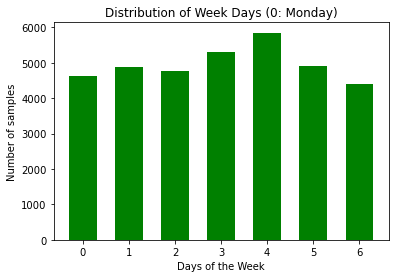

In [69]:
import matplotlib.pyplot as plt
day_distrib = df_final['Week Day'].value_counts().to_dict()
plt.bar(day_distrib.keys(), day_distrib.values(), width=0.6, color='g')
plt.title("Distribution of Week Days (0: Monday)")
plt.xlabel("Days of the Week")
plt.ylabel("Number of samples")